In [1]:
import re
import pickle
import operator
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from scipy.sparse import csr_matrix
from pandas.api.types import is_numeric_dtype
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the required libraries
#Data wrangling
import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth",1000)#setting maximum column width
#data visualization
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
#To create wordcloud
plt.rcParams["figure.figsize"] = (8,8)

In [3]:
book_file_path = r"C:\Users\ranau\Desktop\COLLEGE PROJECT\Bookrecommendersystem-main\database\Books.csv"

# Reading Books.csv into a DataFrame
books_df = pd.read_csv(book_file_path)

# Path to the Users.csv file
users_file_path = r"C:\Users\ranau\Desktop\COLLEGE PROJECT\Bookrecommendersystem-main\database\Users.csv"

# Reading Users.csv into a DataFrame
users_df = pd.read_csv(users_file_path)

# Path to the Book-Ratings.csv file
ratings_file_path = r"C:\Users\ranau\Desktop\COLLEGE PROJECT\Bookrecommendersystem-main\database\Ratings.csv"

# Reading Book-Ratings.csv into a DataFrame
rating_df = pd.read_csv(ratings_file_path)

# Print the shapes of the DataFrames
print("Books Data:    ", books_df.shape)
print("Users Data:    ", users_df.shape)
print("Books-ratings: ", rating_df.shape)

Books Data:     (271360, 8)
Users Data:     (278858, 3)
Books-ratings:  (1149780, 3)


## **Taking a look at datasets**

In [4]:
users_df.head(3)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [5]:
books_df.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg


In [6]:
books_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0440400988.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0440400988.01.LZZZZZZZ.jpg
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0525447644.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0525447644.01.LZZZZZZZ.jpg
271357,006008667X,Lily Dale : The True Story of the Town that Talks to the Dead,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/006008667X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/006008667X.01.LZZZZZZZ.jpg
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0192126040.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0192126040.01.LZZZZZZZ.jpg


In [7]:

import pandas as pd

# Assuming you already have a DataFrame named df

# First, select the first 8 rows
df_head_8 = books_df

# Then, save it as a pickle file
df_head_8.to_pickle("df_head_8.pkl")


In [8]:
rating_df.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [9]:
# shapes of all the datasets
print('Shape of Users: {}, Books: {} and Ratings: {}'.format(users_df.shape, books_df.shape, rating_df.shape))

Shape of Users: (278858, 3), Books: (271360, 8) and Ratings: (1149780, 3)


# **Books data**



---


###**Data Description**

Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.


In [10]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [11]:
print('This shape of Books datasheet is : ',books_df.shape)
print('='*30)
print('This shape of Ratings datasheet is : ',rating_df.shape)
print('='*30)
print('This shape of Users datasheet is : ',users_df.shape)

This shape of Books datasheet is :  (271360, 8)
This shape of Ratings datasheet is :  (1149780, 3)
This shape of Users datasheet is :  (278858, 3)


In [12]:
print(books_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None


In [13]:
books_df.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/185326119X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/225307649X.01.LZZZZZZZ.jpg
freq,1,27,632,13903,7535,2,2,2


In [14]:
# Missing value percentage
print(books_df.isnull().sum()/len(books_df)*100)

ISBN                   0.000000
Book-Title             0.000000
Book-Author            0.000737
Year-Of-Publication    0.000000
Publisher              0.000737
Image-URL-S            0.000000
Image-URL-M            0.000000
Image-URL-L            0.001106
dtype: float64


In [15]:
# Checking  for  null value in book author
books_df[books_df['Book-Author'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0751352497.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0751352497.01.LZZZZZZZ.jpg
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.LZZZZZZZ.jpg


In [16]:
#Filling the null value
books_df.loc[187689, 'Book-Author'] = 'Larissa Anne Downes'

In [17]:
# Checking null values in publisher
books_df[books_df['Publisher'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg


In [18]:
#Replacing NaNs with correct  values
books_df.loc[128890, 'Publisher'] = 'Mundania Press LLC'
books_df.loc[129037, 'Publisher'] = 'Bantam'

In [19]:
#insepcting the values in year of publication
books_df['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

Name of few publication companies have been incorrectly put in this column.There are values such as 0 ,2024,2030 etc. which is also not possible .Let's rectify these mistakes

In [20]:
# correcting this error
books_df[books_df['Year-Of-Publication'] == 'DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


In [21]:
# on searching for these  books we came to know about its authors
#ISBN '078946697X'
books_df.loc[books_df.ISBN == '078946697X','Year-Of-Publication'] = 2000
books_df.loc[books_df.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books_df.loc[books_df.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books_df.loc[books_df.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#ISBN '0789466953'
books_df.loc[books_df.ISBN == '0789466953','Year-Of-Publication'] = 2000
books_df.loc[books_df.ISBN == '0789466953','Book-Author'] = "James Buckley"
books_df.loc[books_df.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books_df.loc[books_df.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

In [22]:
#checking the rows having 'Gallimard' as yearOfPublication
books_df.loc[books_df['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN


In [23]:
books_df.loc[books_df.ISBN=='2070426769','Year-Of-Publication']=2003
books_df.loc[books_df.ISBN=='2070426769','Book-Author']='Jean-Marie Gustave Le ClÃ?Â©zio'
books_df.loc[books_df.ISBN=='2070426769','Publisher']='Gallimard'
books_df.loc[books_df.ISBN=='2070426769','Book-Title']="Peuple du ciel, suivi de 'Les Bergers"

In [24]:
#Checking if the corrections are in place
books_df.loc[books_df['ISBN'].isin(['2070426769','0789466953','078946697X'])]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


In [25]:
# changing dtype of year of publication
books_df['Year-Of-Publication'] =books_df['Year-Of-Publication'].astype(int)

In [26]:
# something is off about years of publication like:
books_df[(books_df['Year-Of-Publication'] > 0) & (books_df['Year-Of-Publication'] < 1800)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
227531,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378,Intisharat-i Quqnus,http://images.amazon.com/images/P/9643112136.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/9643112136.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/9643112136.01.LZZZZZZZ.jpg
253750,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376,Nashr-i Alburz,http://images.amazon.com/images/P/964442011X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/964442011X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/964442011X.01.LZZZZZZZ.jpg


In [27]:
#replacing with correct  values
books_df.loc[books_df.ISBN=='	9643112136','Year-Of-Publication'] = 2010
books_df.loc[books_df.ISBN=='964442011X', 'Year-Of-Publication'] = 1991

In [28]:
#Sustituting np.Nan in rows with year=0 or  greater than the current year,2022.
books_df.loc[(books_df['Year-Of-Publication'] > 2022) | (books_df['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

# replacing NaN values with median value of Year-Of-Publication
books_df['Year-Of-Publication'].fillna(int(books_df['Year-Of-Publication'].median()), inplace=True)

In [29]:
books_df['Book-Author'].value_counts()

Book-Author
Agatha Christie         632
William Shakespeare     567
Stephen King            524
Ann M. Martin           423
Carolyn Keene           373
                       ... 
R. Gelman                 1
Ellery R. Sheets          1
Artiste C. Arthur         1
Emily Pearl Kingsley      1
Christopher  Biffle       1
Name: count, Length: 102021, dtype: int64

In [30]:
books_df['Publisher'].value_counts()

Publisher
Harlequin                        7535
Silhouette                       4220
Pocket                           3905
Ballantine Books                 3783
Bantam Books                     3646
                                 ... 
Windstream Publishing Company       1
Polaris Books                       1
Hannover House                      1
Amber Quill Press, LLC.             1
Connaught                           1
Name: count, Length: 16804, dtype: int64

In [31]:
#Inspecting the missing values in 'Publisher' column
books_df.loc[books_df.Publisher.isnull(),:]


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [32]:
#Uppercasing the ISBN numbers and Book-Author name
books_df['ISBN']=books_df['ISBN'].str.upper()
books_df['Book-Author']=books_df['Book-Author'].str.upper()

In [33]:
books_df[books_df['Book-Title']=='Emma']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1495,0451523067,Emma,JANE AUSTEN,1994.0,New Amer Library Classics,http://images.amazon.com/images/P/0451523067.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0451523067.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0451523067.01.LZZZZZZZ.jpg
8763,055321019X,Emma,JANE AUSTEN,1981.0,Bantam Books,http://images.amazon.com/images/P/055321019X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/055321019X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/055321019X.01.LZZZZZZZ.jpg
11571,0553212737,Emma,JANE AUSTEN,1984.0,Bantam,http://images.amazon.com/images/P/0553212737.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0553212737.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0553212737.01.LZZZZZZZ.jpg
14263,0140258175,Emma,JANE AUSTEN,1996.0,Penguin Putnam~trade,http://images.amazon.com/images/P/0140258175.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0140258175.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0140258175.01.LZZZZZZZ.jpg
45955,B000051WXP,Emma,JANE AUSTEN,1996.0,Random House,http://images.amazon.com/images/P/B000051WXP.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/B000051WXP.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/B000051WXP.01.LZZZZZZZ.jpg
53513,0760701652,Emma,JANE AUSTEN,1996.0,Barnes Noble Books,http://images.amazon.com/images/P/0760701652.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0760701652.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0760701652.01.LZZZZZZZ.jpg
90473,2253140732,Emma,JANE AUSTEN,1997.0,LGF,http://images.amazon.com/images/P/2253140732.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2253140732.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2253140732.01.LZZZZZZZ.jpg
106616,0460010247,Emma,JANE AUSTEN,1976.0,J m Dent &amp; Sons Ltd,http://images.amazon.com/images/P/0460010247.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0460010247.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0460010247.01.LZZZZZZZ.jpg
133269,0553211595,Emma,JANE AUSTEN,1984.0,Bantam,http://images.amazon.com/images/P/0553211595.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0553211595.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0553211595.01.LZZZZZZZ.jpg
166404,0681218894,Emma,JANE AUSTEN,1996.0,Hunter Publishing+inc,http://images.amazon.com/images/P/0681218894.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0681218894.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0681218894.01.LZZZZZZZ.jpg


ISBN numbers for books with the same title and author would change if the year of release (revised editions),regional versions or publishing companies are different. So, let's look for rows where entire column values are identical.

In [34]:
#Checking for duplicates in books_df
books_df[books_df.duplicated()]                

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
6635,002542730X,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,JAMES FINN GARNER,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg
11925,014062080X,The Scarlet Letter (Penguin Popular Classics),NATHANIEL HAWTHORNE,1994.0,Penguin Books Ltd,http://images.amazon.com/images/P/014062080X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/014062080X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/014062080X.01.LZZZZZZZ.jpg
16298,097089726X,Jasper,MICHELLE GROCE,2003.0,Novello Festival Press,http://images.amazon.com/images/P/097089726X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/097089726X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/097089726X.01.LZZZZZZZ.jpg
19266,039592720X,Interpreter of Maladies,JHUMPA LAHIRI,1999.0,Houghton Mifflin Co,http://images.amazon.com/images/P/039592720X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/039592720X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/039592720X.01.LZZZZZZZ.jpg
22339,042512164X,Capital Crimes,LAWRENCE SANDERS,2000.0,Berkley Publishing Group,http://images.amazon.com/images/P/042512164X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/042512164X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/042512164X.01.LZZZZZZZ.jpg
...,...,...,...,...,...,...,...,...
267020,088404632X,Dianetics: The Modern Science of Mental Health,L. RON HUBBARD,1995.0,Bridge Publications (CA),http://images.amazon.com/images/P/088404632X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/088404632X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/088404632X.01.LZZZZZZZ.jpg
269297,055215038X,The Sleeper,GILLIAN WHITE,2003.0,Corgi Books,http://images.amazon.com/images/P/055215038X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/055215038X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/055215038X.01.LZZZZZZZ.jpg
269552,037376099X,"Patient Nurse (Man Of The Month) (Harlequin Desire, No 1099)",DIANA PALMER,1997.0,Silhouette,http://images.amazon.com/images/P/037376099X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/037376099X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/037376099X.01.LZZZZZZZ.jpg
270285,189481505X,I-O,SIMON LOGAN,2002.0,Prime (OH),http://images.amazon.com/images/P/189481505X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/189481505X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/189481505X.01.LZZZZZZZ.jpg


In [35]:
#Dropping the rows with the entire column values are duplicated
books_df.drop_duplicates(keep="first",inplace=True)
books_df.reset_index(drop=True,inplace=True)   

In [36]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271047 entries, 0 to 271046
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 271047 non-null  object 
 1   Book-Title           271047 non-null  object 
 2   Book-Author          271046 non-null  object 
 3   Year-Of-Publication  271047 non-null  float64
 4   Publisher            271047 non-null  object 
 5   Image-URL-S          271047 non-null  object 
 6   Image-URL-M          271047 non-null  object 
 7   Image-URL-L          271044 non-null  object 
dtypes: float64(1), object(7)
memory usage: 16.5+ MB


# **Users Data**


---




###**Data description**

Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

In [37]:
print("Columns: ", list(users_df.columns))
users_df.head()

Columns:  ['User-ID', 'Location', 'Age']


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [38]:
list_ = users_df.Location.str.split(', ')

city = []
state = []
country = []
count_no_state = 0    
count_no_country = 0

for i in range(0,len(list_)):
    if list_[i][0] == ' ' or list_[i][0] == '' or list_[i][0]=='n/a' or list_[i][0] == ',':  #removing invalid entries too
        city.append('other')
    else:
        city.append(list_[i][0].lower())

    if(len(list_[i])<2):
        state.append('other')
        country.append('other')
        count_no_state += 1
        count_no_country += 1
    else:
        if list_[i][1] == ' ' or list_[i][1] == '' or list_[i][1]=='n/a' or list_[i][1] == ',':   #removing invalid entries 
            state.append('other')
            count_no_state += 1            
        else:
            state.append(list_[i][1].lower())
        
        if(len(list_[i])<3):
            country.append('other')
            count_no_country += 1
        else:
            if list_[i][2] == ''or list_[i][1] == ',' or list_[i][2] == ' ' or list_[i][2] == 'n/a':
                country.append('other')
                count_no_country += 1
            else:
                country.append(list_[i][2].lower())
        
users_df = users_df.drop('Location',axis=1)

temp = []
for ent in city:
    c = ent.split('/')            #handling cases where city/state entries from city list as state is already given 
    temp.append(c[0])

df_city = pd.DataFrame(temp,columns=['City'])
df_state = pd.DataFrame(state,columns=['State'])
df_country = pd.DataFrame(country,columns=['Country'])

users_df = pd.concat([users_df, df_city], axis=1)
users_df = pd.concat([users_df, df_state], axis=1)
users_df = pd.concat([users_df, df_country], axis=1)

print(count_no_country)   #printing the number of countries didnt have any values 
print(count_no_state)     #printing the states which didnt have any values

4659
16044


In [39]:
## Drop duplicate rows
users_df.drop_duplicates(keep='last', inplace=True)
users_df.reset_index(drop=True, inplace=True)

In [40]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   User-ID  278858 non-null  int64  
 1   Age      168096 non-null  float64
 2   City     278858 non-null  object 
 3   State    278858 non-null  object 
 4   Country  278858 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 10.6+ MB


In [41]:
users_df.head()

,User-ID,Age,City,State,Country
0,1,NaN,nyc,new york,usa
1,2,18.0,stockton,california,usa
2,3,NaN,moscow,yukon territory,russia
3,4,17.0,porto,v.n.gaia,portugal
4,5,NaN,farnborough,hants,united kingdom


In [42]:
#displaying the top 10 and bottom 10 rows of the dataframe
pd.concat([users_df.head(10),users_df.tail(10)],axis=0)

,User-ID,Age,City,State,Country
0,1,NaN,nyc,new york,usa
1,2,18.0,stockton,california,usa
2,3,NaN,moscow,yukon territory,russia
3,4,17.0,porto,v.n.gaia,portugal
4,5,NaN,farnborough,hants,united kingdom
5,6,61.0,santa monica,california,usa
6,7,NaN,washington,dc,usa
7,8,NaN,timmins,ontario,canada
8,9,NaN,germantown,tennessee,usa
9,10,26.0,albacete,wisconsin,spain


In [43]:
#inspecting the columns in users_df
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   User-ID  278858 non-null  int64  
 1   Age      168096 non-null  float64
 2   City     278858 non-null  object 
 3   State    278858 non-null  object 
 4   Country  278858 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 10.6+ MB


* There are records of 278858 users in this dataframe.There are 3 columns in this dataframe.
* The 'Age' column has null values

In [44]:
#Checking for duplicates in users_df
users_df[users_df['User-ID'].duplicated()].sum()

User-ID      0
Age        0.0
City         0
State        0
Country      0
dtype: object

In [45]:
#Percentage of missing values in users_df
print(users_df.isnull().sum()/len(users_df)*100)

User-ID     0.000000
Age        39.719857
City        0.000000
State       0.000000
Country     0.000000
dtype: float64


* The 39.7% of values in the 'Age' column are missing/NaN values

In [46]:
#summarizing data in 'Age' column
users_df['Age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

* The maximum value in the 'Age' column is 244. This is certainly an outlier.

<Axes: xlabel='Age'>

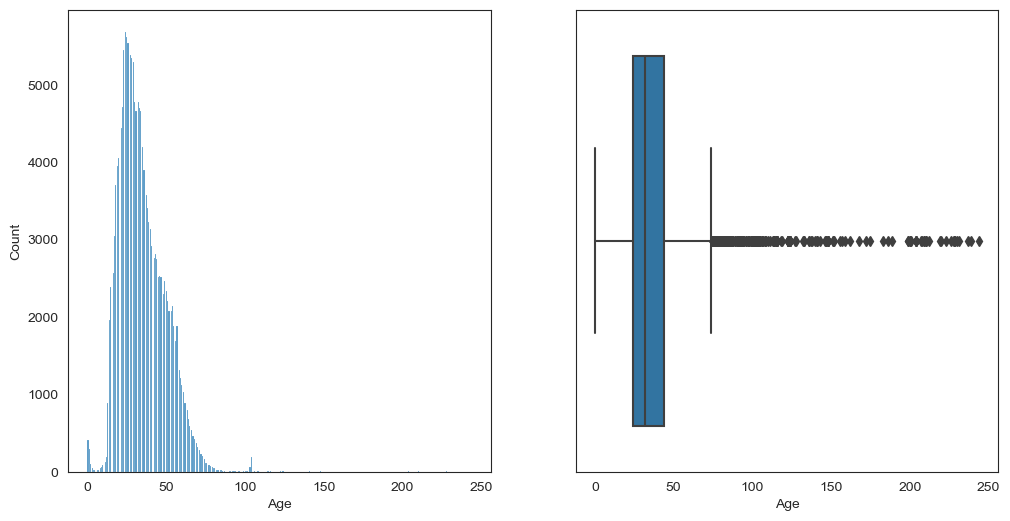

In [47]:
#Histogram showing distribution of ages
fig=plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(x='Age',data=users_df)

#boxplot of Age column
plt.subplot(1,2,2)
sns.boxplot(x='Age',data=users_df)

* Most of the users are from the age group 25-50
* It is highly unlikely to have users under the age of 4 and above 100.The peaks near 0 and 100 in the kdeplot indicates that there are some outlier values in the 'Age' column

It is highly unlikely to have users of age above 95 and below 4 in this case.Let's replace these values with np.nan

In [48]:
#replacing the outliers in 'Age' with NaN value
users_df.loc[(users_df['Age']>95)|(users_df['Age']<4),'Age']=np.nan

In [49]:
#Displaying the current number of missing values in  'Age' column
print('The number of missing values is ',users_df['Age'].isnull().sum())
#Imputing such a large amount of null values will mean/mode/median will drastically change the distribution
users_df['Age'].describe()

The number of missing values is  112001


count    166857.000000
mean         34.734222
std          13.621521
min           4.000000
25%          24.000000
50%          32.000000
75%          44.000000
max          95.000000
Name: Age, dtype: float64

In [50]:
# create a normal distribution pd.Series to fill Nan values with
normal_age_series = pd.Series(np.random.normal(loc=users_df.Age.mean(), scale=users_df.Age.std(), size=users_df[users_df.Age.isna()]['User-ID'].count()))

# take the absolute value of temp_age_series
abs_age_series=np.abs(normal_age_series)

# sort users df so as NaN values in age to be first and reset index to match with index of abs_age_series. Then using fillna()
users_df = users_df.sort_values('Age',na_position='first').reset_index(drop=True)
users_df.Age.fillna(round(abs_age_series), inplace = True)  


In [51]:
#after imputation
users_df.Age.describe()

count    278858.000000
mean         34.742962
std          13.591145
min           0.000000
25%          25.000000
50%          33.000000
75%          44.000000
max          95.000000
Name: Age, dtype: float64

In [52]:
#percentage of missing values in 'Age' column
(users_df['Age'].isnull().sum()/len(users_df))*100


0.0

In [53]:
def age_group(age):
  ''' 
  defines the age group of users
  '''
  if age<13:
    x='Children'
  elif age>=13 and age<18:
    x='Teens'
  elif age>=18 and age<36:
    x='Youth'
  elif age>=36 and age<56:
    x='Middle aged adults'
  else:
    x='Elderly'
  return x

In [54]:
users_df['Age_group']=users_df['Age'].apply(lambda x: age_group(x))

The missing values in the 'Age' column have been imputed with values from a normal distribution 

Now let's inspect the 'Location' column.

In [55]:
#number of unique values in 'Location'
users_df['City'].nunique()

32820

In [56]:
users_df.columns

Index(['User-ID', 'Age', 'City', 'State', 'Country', 'Age_group'], dtype='object')

In [57]:
users_df.head()

,User-ID,Age,City,State,Country,Age_group
0,1,38.0,nyc,new york,usa,Middle aged adults
1,3,43.0,moscow,yukon territory,russia,Middle aged adults
2,5,27.0,farnborough,hants,united kingdom,Youth
3,7,50.0,washington,dc,usa,Middle aged adults
4,8,24.0,timmins,ontario,canada,Youth


## **Ratings data**


---



### **Data description**

Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

In [58]:
#displaying the first 5 rows
rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [59]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [60]:
# checking null values
rating_df.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [61]:
# checking for unique user ids and isbn values
print('Number of unique user ids is {} and ISBN no. is {}'.format(rating_df['User-ID'].nunique(), rating_df['ISBN'].nunique()))

Number of unique user ids is 105283 and ISBN no. is 340556




> *This means that many users are buying multiple books. Also some books are really famous and hence are bought by multiple users.*



In [62]:
# making all the ISBN no. uppercase
rating_df['ISBN'].apply(lambda x: x.upper())

0           034545104X
1           0155061224
2           0446520802
3           052165615X
4           0521795028
              ...     
1149775     1563526298
1149776     0679447156
1149777     0515107662
1149778     0590442449
1149779    05162443314
Name: ISBN, Length: 1149780, dtype: object

In [63]:
# checking for duplicates
rating_df[rating_df.duplicated()].sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: object

In [64]:
# lets see if all the books in rating_df are also in books_df
rating_df_new = rating_df[rating_df['ISBN'].isin(books_df['ISBN'])]

In [65]:
print('Shape of rating_df: {} and rating_df_new: {}'.format(rating_df.shape, rating_df_new.shape))

Shape of rating_df: (1149780, 3) and rating_df_new: (1030617, 3)


In [66]:
# book ratings
rating_df_new['Book-Rating'].value_counts().reset_index()

,Book-Rating,count
0,0,646974
1,8,91739
2,10,71194
3,7,66356
4,9,60754
5,5,45343
6,6,31673
7,4,7613
8,3,5117
9,2,2374




> *We can see for explicit ratings that rating 8 is received by most number of books followed by rating 10.*
> *There are 646974 implicitely rated books.*



In [67]:
# most popular books
rating_df_new.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]

,ISBN,Book-Rating
215608,0971880107,2502
38505,0316666343,1295
70686,0385504209,883
7325,0060928336,732
32311,0312195516,723
87235,044023722X,647
21293,0142001740,615
144784,067976402X,614
132908,0671027360,586
93670,0446672211,585




> *but this contains both explicit and implicit rating, so we need to seperate them to get better idea.*



In [68]:
explicit_rating = rating_df_new[rating_df_new['Book-Rating'] != 0]
implicit_rating = rating_df_new[rating_df_new['Book-Rating'] == 0]
print('Shape of explicit rating: {} and implicit rating: {}'.format(explicit_rating.shape, implicit_rating.shape))

Shape of explicit rating: (383643, 3) and implicit rating: (646974, 3)


In [69]:
# most purchased books including the implicitely rated books
rating_df_new.groupby('ISBN')['User-ID'].count().reset_index().sort_values(by='User-ID', ascending=False)[:10]['ISBN'].values

array(['0971880107', '0316666343', '0385504209', '0060928336',
       '0312195516', '044023722X', '0142001740', '067976402X',
       '0671027360', '0446672211'], dtype=object)

In [70]:
# getting the book names corresponding to these ISBNs
isbn_nums = ['0971880107', '0316666343', '0385504209', '0060928336',
       '0312195516', '044023722X', '0142001740', '067976402X',
       '0671027360', '0446672211']
books_df[books_df['ISBN'].isin(isbn_nums)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
26,0971880107,Wild Animus,RICH SHAPERO,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.LZZZZZZZ.jpg
118,0671027360,Angels &amp; Demons,DAN BROWN,2001.0,Pocket Star,http://images.amazon.com/images/P/0671027360.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0671027360.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0671027360.01.LZZZZZZZ.jpg
305,044023722X,A Painted House,JOHN GRISHAM,2001.0,Dell Publishing Company,http://images.amazon.com/images/P/044023722X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/044023722X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/044023722X.01.LZZZZZZZ.jpg
356,0142001740,The Secret Life of Bees,SUE MONK KIDD,2003.0,Penguin Books,http://images.amazon.com/images/P/0142001740.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0142001740.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0142001740.01.LZZZZZZZ.jpg
408,0316666343,The Lovely Bones: A Novel,ALICE SEBOLD,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.LZZZZZZZ.jpg
522,0312195516,The Red Tent (Bestselling Backlist),ANITA DIAMANT,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0312195516.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0312195516.01.LZZZZZZZ.jpg
706,0446672211,Where the Heart Is (Oprah's Book Club (Paperback)),BILLIE LETTS,1998.0,Warner Books,http://images.amazon.com/images/P/0446672211.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0446672211.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0446672211.01.LZZZZZZZ.jpg
748,0385504209,The Da Vinci Code,DAN BROWN,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.LZZZZZZZ.jpg
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,REBECCA WELLS,1997.0,Perennial,http://images.amazon.com/images/P/0060928336.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060928336.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060928336.01.LZZZZZZZ.jpg
1922,067976402X,Snow Falling on Cedars,DAVID GUTERSON,1995.0,Vintage Books USA,http://images.amazon.com/images/P/067976402X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/067976402X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/067976402X.01.LZZZZZZZ.jpg


In [71]:
# most popular explicitely rated books
explicit_rating.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]

,ISBN,Book-Rating
21915,0316666343,707
117593,0971880107,581
38771,0385504209,487
18032,0312195516,383
4122,0060928336,320
68795,059035342X,313
12303,0142001740,307
51715,0446672211,295
47910,044023722X,281
57539,0452282152,278


In [72]:
# getting the book names corresponding to these ISBNs
isbn_nums = ['0316666343', '0971880107', '0385504209', '0312195516', '0060928336']
books_df[books_df['ISBN'].isin(isbn_nums)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
26,0971880107,Wild Animus,RICH SHAPERO,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.LZZZZZZZ.jpg
408,0316666343,The Lovely Bones: A Novel,ALICE SEBOLD,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.LZZZZZZZ.jpg
522,0312195516,The Red Tent (Bestselling Backlist),ANITA DIAMANT,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0312195516.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0312195516.01.LZZZZZZZ.jpg
748,0385504209,The Da Vinci Code,DAN BROWN,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.LZZZZZZZ.jpg
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,REBECCA WELLS,1997.0,Perennial,http://images.amazon.com/images/P/0060928336.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060928336.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060928336.01.LZZZZZZZ.jpg




> *therefore the most popular book is 'The Lovely Bones: A Novel'*



## **Merging Datasets**

---






In [73]:
# for the rating dataset, we are only taking the explicit rating dataset
df = pd.merge(books_df, explicit_rating, on='ISBN', how='inner')
df = pd.merge(df, users_df, on='User-ID', how='inner')

In [74]:
#shape of the merged dataframe 'df'
df.shape

(383693, 15)

In [75]:
#displaying the top 3 rows of df
df.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Age,City,State,Country,Age_group
0,0002005018,Clara Callan,RICHARD BRUCE WRIGHT,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,8,5,24.0,timmins,ontario,canada,Youth
1,074322678X,Where You'll Find Me: And Other Stories,ANN BEATTIE,2002.0,Scribner,http://images.amazon.com/images/P/074322678X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/074322678X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/074322678X.01.LZZZZZZZ.jpg,8,5,24.0,timmins,ontario,canada,Youth
2,0887841740,The Middle Stories,SHEILA HETI,2004.0,House of Anansi Press,http://images.amazon.com/images/P/0887841740.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0887841740.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0887841740.01.LZZZZZZZ.jpg,8,5,24.0,timmins,ontario,canada,Youth


In [76]:
df.head(8)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Age,City,State,Country,Age_group
0,0002005018,Clara Callan,RICHARD BRUCE WRIGHT,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,8,5,24.0,timmins,ontario,canada,Youth
1,074322678X,Where You'll Find Me: And Other Stories,ANN BEATTIE,2002.0,Scribner,http://images.amazon.com/images/P/074322678X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/074322678X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/074322678X.01.LZZZZZZZ.jpg,8,5,24.0,timmins,ontario,canada,Youth
2,0887841740,The Middle Stories,SHEILA HETI,2004.0,House of Anansi Press,http://images.amazon.com/images/P/0887841740.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0887841740.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0887841740.01.LZZZZZZZ.jpg,8,5,24.0,timmins,ontario,canada,Youth
3,1552041778,Jane Doe,R. J. KAISER,1999.0,Mira Books,http://images.amazon.com/images/P/1552041778.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1552041778.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1552041778.01.LZZZZZZZ.jpg,8,5,24.0,timmins,ontario,canada,Youth
4,1567407781,The Witchfinder (Amos Walker Mystery Series),LOREN D. ESTLEMAN,1998.0,Brilliance Audio - Trade,http://images.amazon.com/images/P/1567407781.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1567407781.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1567407781.01.LZZZZZZZ.jpg,8,6,24.0,timmins,ontario,canada,Youth
5,1575663937,More Cunning Than Man: A Social History of Rats and Man,ROBERT HENDRICKSON,1999.0,Kensington Publishing Corp.,http://images.amazon.com/images/P/1575663937.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1575663937.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1575663937.01.LZZZZZZZ.jpg,8,6,24.0,timmins,ontario,canada,Youth
6,1881320189,Goodbye to the Buttermilk Sky,JULIA OLIVER,1994.0,River City Pub,http://images.amazon.com/images/P/1881320189.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1881320189.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1881320189.01.LZZZZZZZ.jpg,8,7,24.0,timmins,ontario,canada,Youth
7,0002005018,Clara Callan,RICHARD BRUCE WRIGHT,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,11676,8,39.0,other,other,other,Middle aged adults


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383693 entries, 0 to 383692
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 383693 non-null  object 
 1   Book-Title           383693 non-null  object 
 2   Book-Author          383692 non-null  object 
 3   Year-Of-Publication  383693 non-null  float64
 4   Publisher            383693 non-null  object 
 5   Image-URL-S          383693 non-null  object 
 6   Image-URL-M          383693 non-null  object 
 7   Image-URL-L          383692 non-null  object 
 8   User-ID              383693 non-null  int64  
 9   Book-Rating          383693 non-null  int64  
 10  Age                  383693 non-null  float64
 11  City                 383693 non-null  object 
 12  State                383693 non-null  object 
 13  Country              383693 non-null  object 
 14  Age_group            383693 non-null  object 
dtypes: float64(2), in

In [82]:
df['Book-Title'].values


array(['Clara Callan', "Where You'll Find Me: And Other Stories",
       'The Middle Stories', ..., 'A Student of Weather',
       'Rimas y leyendas (ClÃ¡sicos Fraile ; 3)',
       'Anglo-American Cataloguing Rules'], dtype=object)

In [86]:
import pandas as pd
import pickle

# Assuming df is your pandas DataFrame
pickle.dump(df.to_dict(),open('book_title_dict.pkl', 'wb'))


## **EDA**

<Axes: title={'center': '\nMost popular ratings\n'}, xlabel='Book-Rating', ylabel='count'>

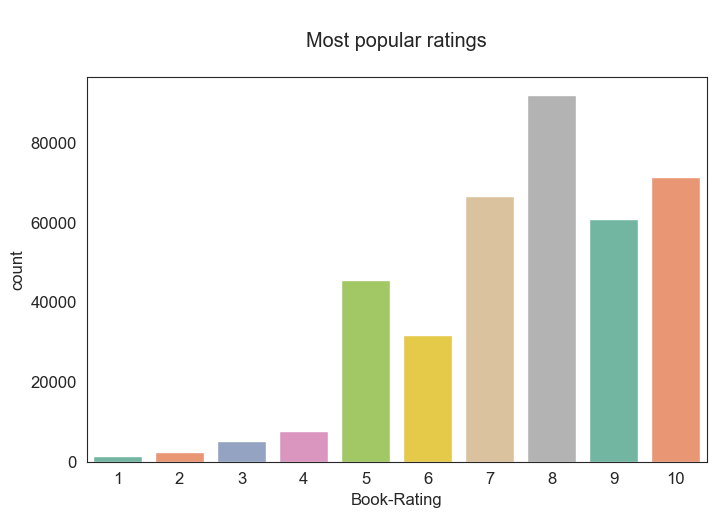

In [78]:
# most popular rating
plt.figure(figsize=[8,5])
plt.rc('font', size=12)
plt.title('\nMost popular ratings\n')
sns.countplot(data=df, x='Book-Rating',palette='Set2')

* Most of users have given above 4 ratings to books 
* 8 is the most common rating given by users


<Axes: title={'center': '\nMost popular books\n'}, xlabel='Count', ylabel='Book-Title'>

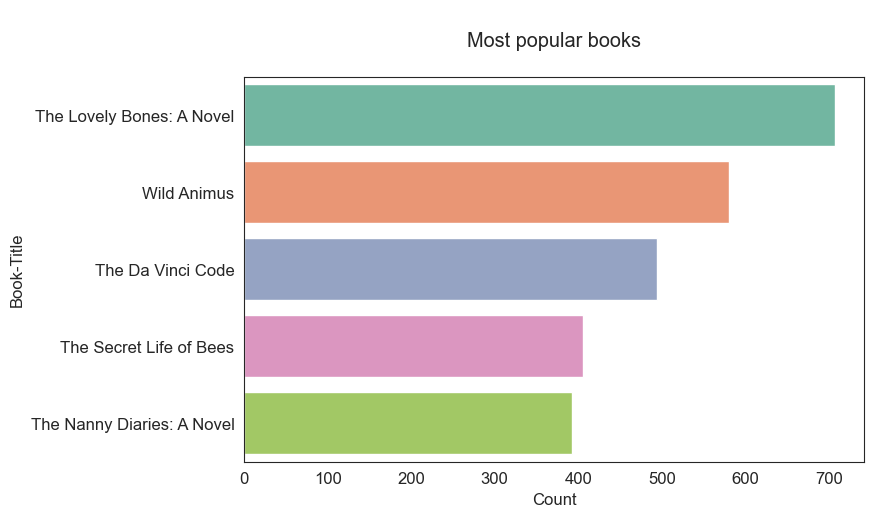

In [79]:
# top 5 most popular books

popular = df.groupby('Book-Title')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:5]
popular.columns = ['Book-Title', 'Count']

plt.figure(figsize=[8, 5])
plt.rc('font', size=12)
plt.title('\nMost popular books\n')
sns.barplot(data=popular, y='Book-Title', x='Count',palette='Set2')

* The book which has been rated by most number of users is  'The Lovely Bones'

<Axes: title={'center': '\nMost popular Authors\n'}, xlabel='Book-Rating', ylabel='Book-Author'>

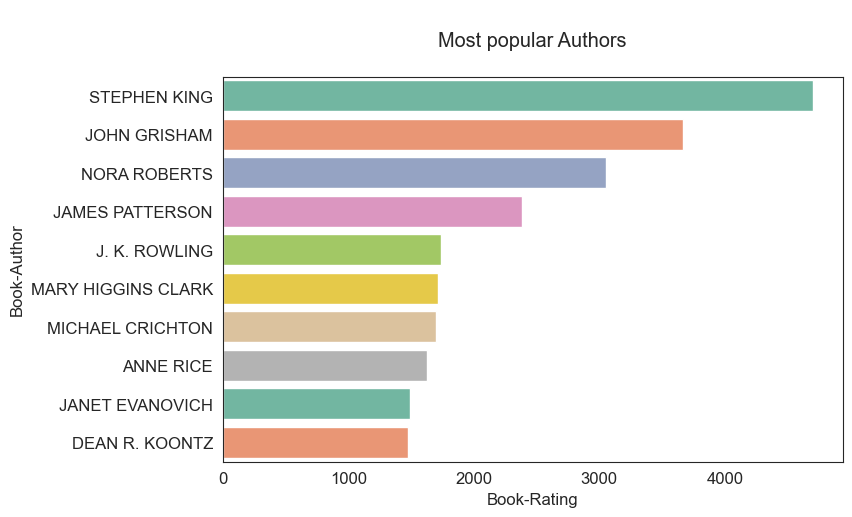

In [80]:
# most popular book authors
author = df.groupby('Book-Author')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]
plt.figure(figsize=[8, 5])
plt.rc('font', size=12)
plt.title('\nMost popular Authors\n')
sns.barplot(data=author, y='Book-Author', x='Book-Rating',palette='Set2')

* Top book author with respect to the number of ratings is Stephen King 

<Axes: xlabel='Age', ylabel='Density'>

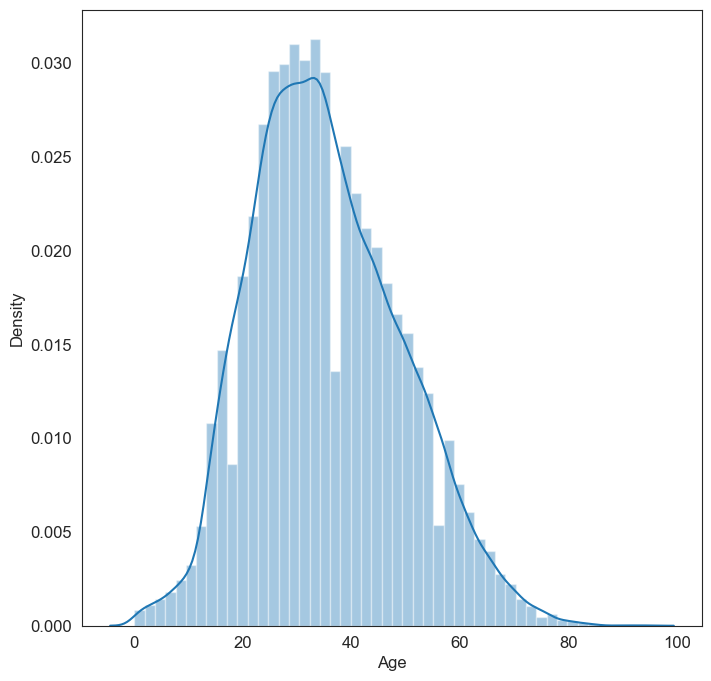

In [81]:
#Age distribution of users
age_df=users_df[users_df['User-ID'].isin(list(df['User-ID'].unique()))]
sns.distplot(age_df.Age)

* The majority of readers are between the ages of 25 and 40.
* Readers who are 80 to 100 years old make up a tiny minority.

In [80]:
#How many users have rated atleast 1 book?
df['User-ID'].value_counts()

User-ID
11676     6940
98391     5692
189835    1899
153662    1846
23902     1180
          ... 
37259        1
53095        1
51124        1
235548       1
259679       1
Name: count, Length: 68080, dtype: int64

There are 68080 users who have rated atleast one book

In [81]:
df.groupby('User-ID')['Book-Rating'].count().describe()

count    68080.000000
mean         5.635914
std         41.736965
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       6940.000000
Name: Book-Rating, dtype: float64

<Axes: xlabel='Book-Title', ylabel='Publisher'>

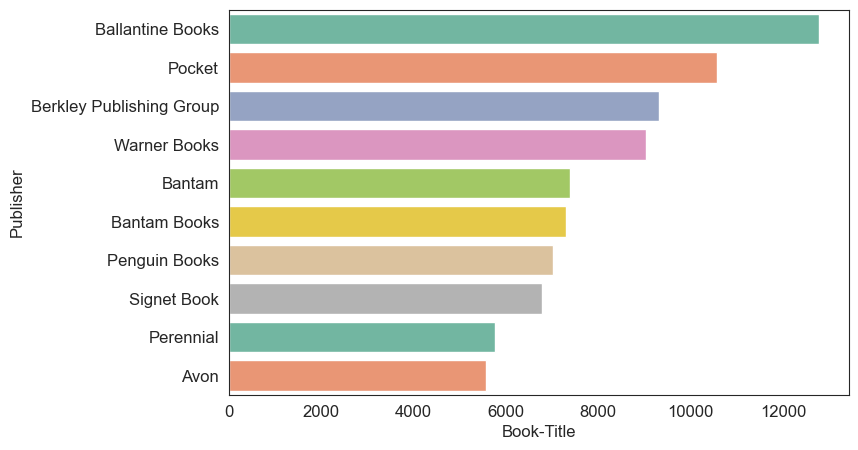

In [82]:
# Publisher with most books

publishers = df.groupby('Publisher')['Book-Title'].count().reset_index().sort_values(by='Book-Title', ascending=False)[:10]
plt.figure(figsize=[8, 5])
sns.barplot(data=publishers, x='Book-Title', y='Publisher',palette='Set2')

*  Ballantine Books is most popular publisher based on the number of users who have rated their books

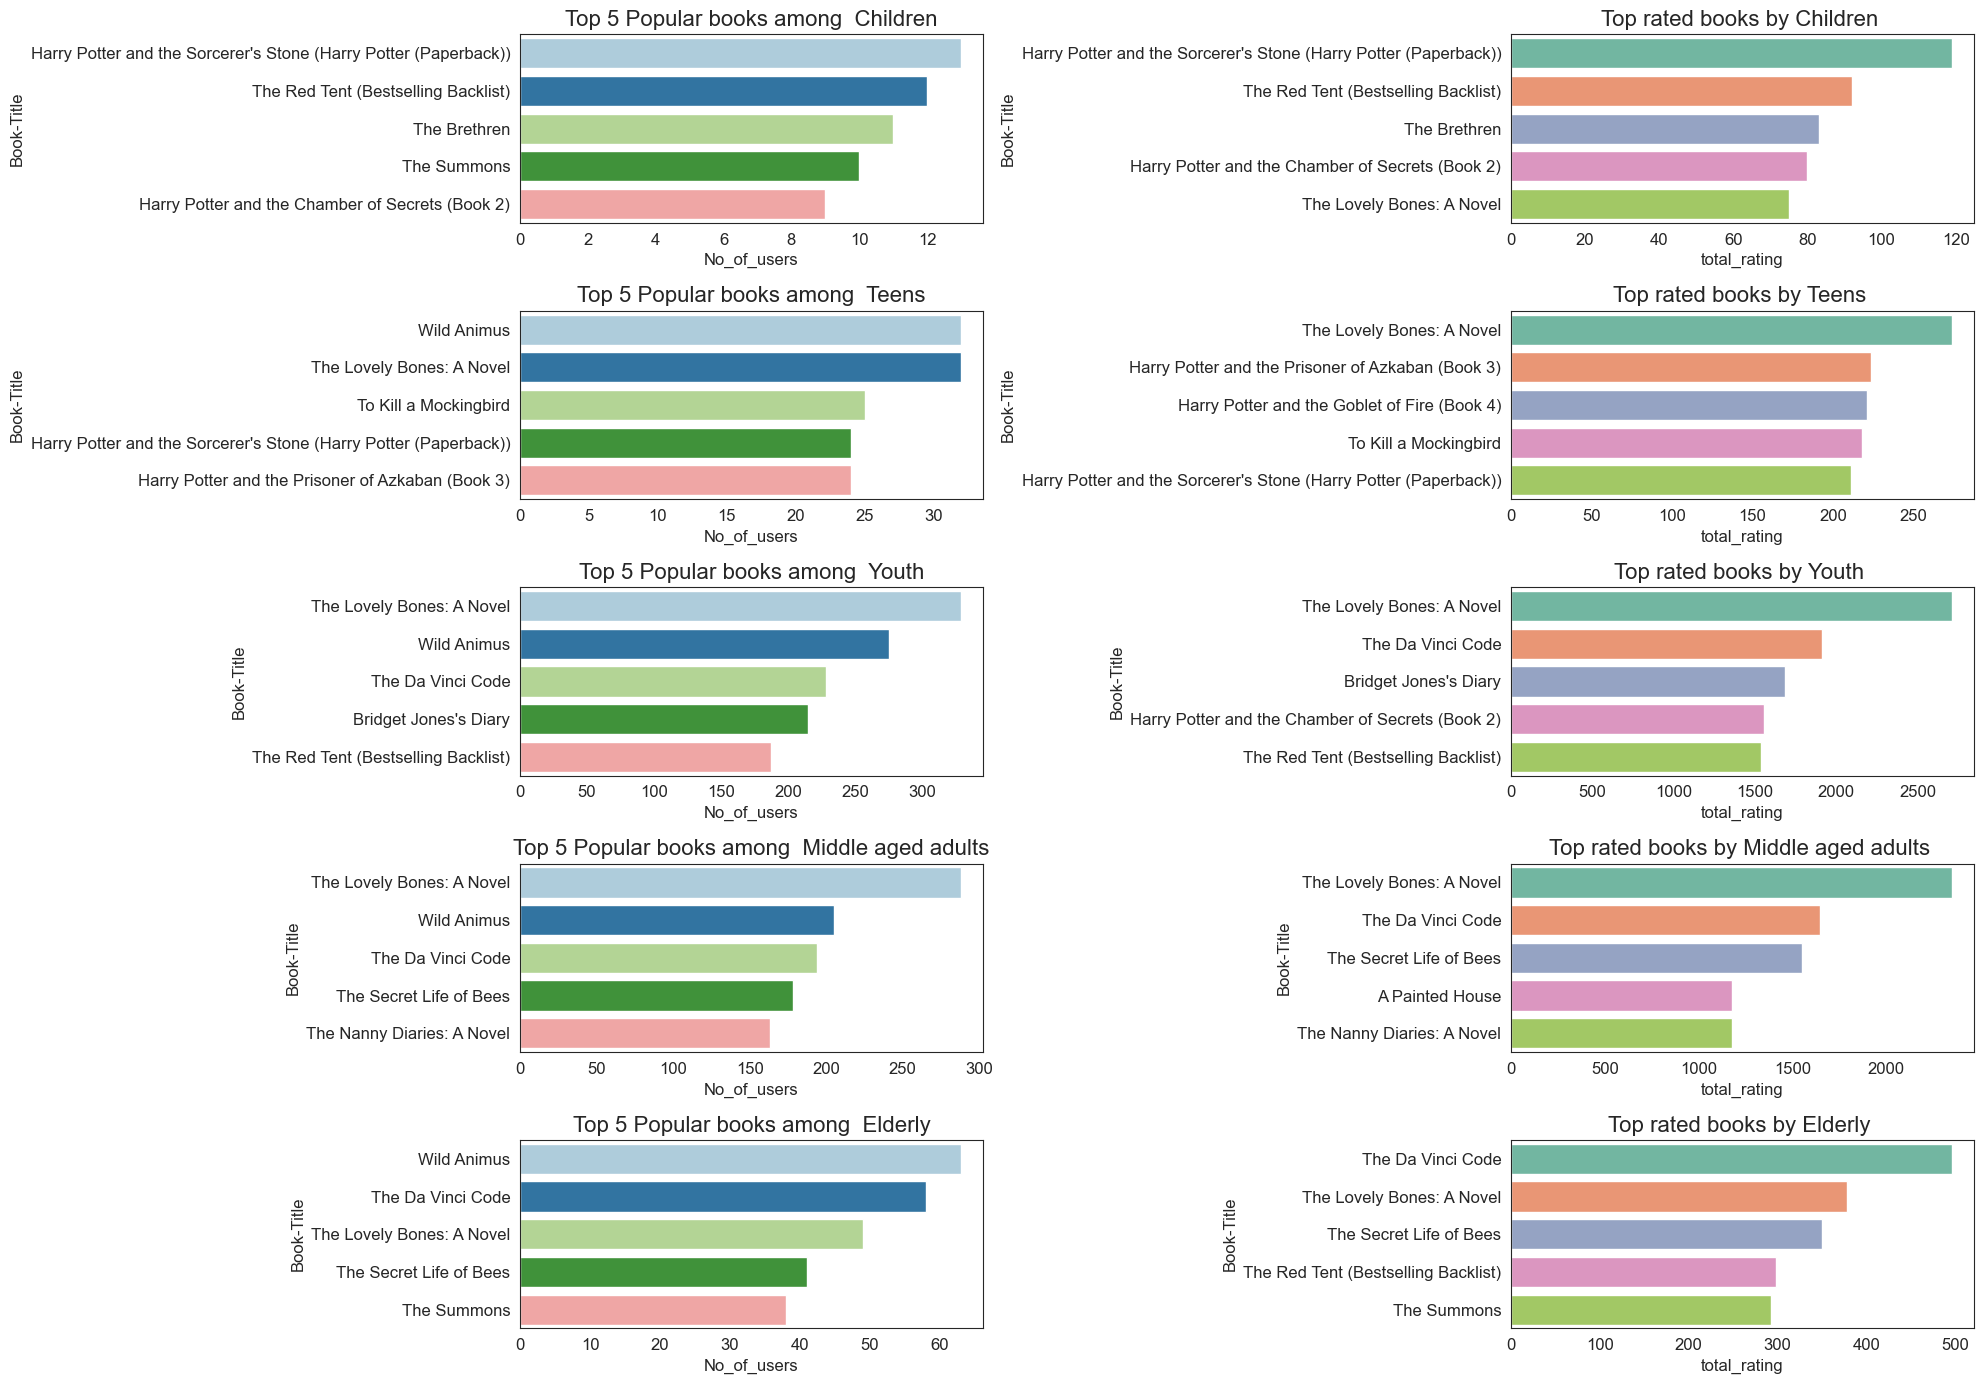

In [83]:
fig=plt.figure(figsize=(20,14))
i=1
for group  in ['Children','Teens','Youth','Middle aged adults','Elderly']:
  age_df=df.loc[df['Age_group']==group].groupby(['Book-Title']).agg(No_of_users=('User-ID','nunique'),total_rating=('Book-Rating','sum')).reset_index() 
  plt.subplot(5,2,i)
  age_df.sort_values(by='No_of_users',ascending=False,inplace=True)
  sns.barplot(x='No_of_users',y='Book-Title',palette='Paired',data=age_df.head(5))
  plt.title('Top 5 Popular books among  {}'.format(group),size=16)
  i+=1
  plt.subplot(5,2,i)
  age_df.sort_values(by='total_rating',ascending=False,inplace=True)
  sns.barplot(x='total_rating',y='Book-Title',palette='Set2',data=age_df.head(5))
  plt.title('Top rated books by {} '.format(group),size=16)
  i+=1
  
plt.tight_layout()

In [84]:
df.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,City,State,Country,Age_group
0,0002005018,Clara Callan,RICHARD BRUCE WRIGHT,2001.0,HarperFlamingo Canada,8,5,32.0,timmins,ontario,canada,Youth
1,074322678X,Where You'll Find Me: And Other Stories,ANN BEATTIE,2002.0,Scribner,8,5,32.0,timmins,ontario,canada,Youth


Text(0.5, 1.0, 'No of books by an author (Top 15)')

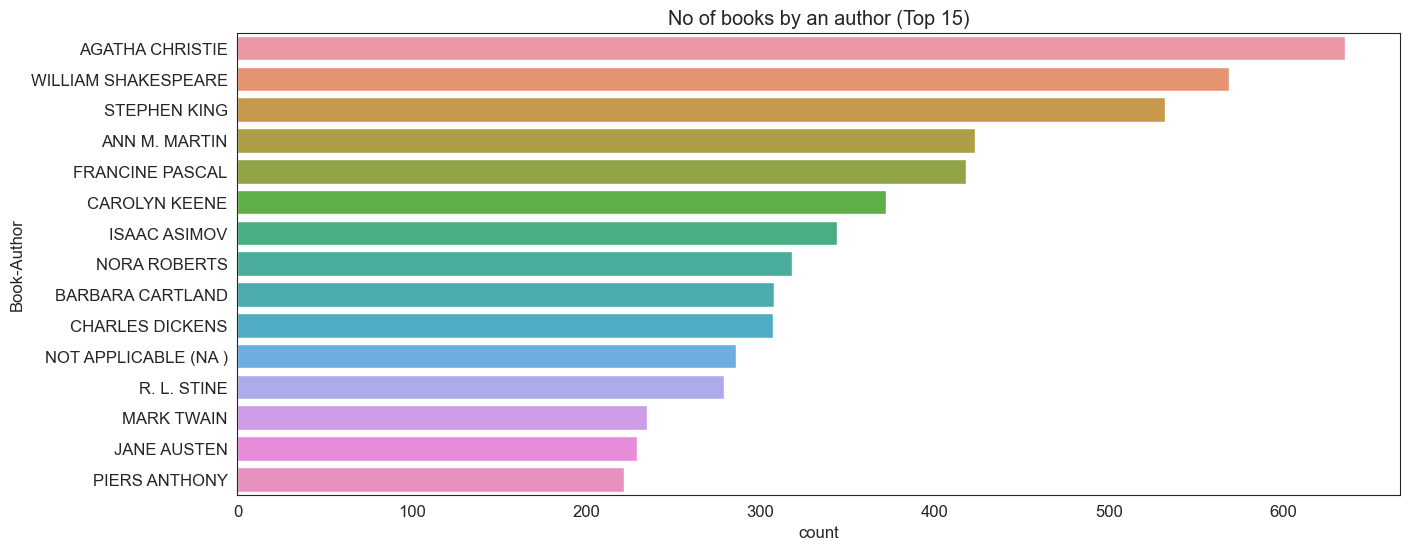

In [85]:
import seaborn as sns
plt.figure(figsize=(15,6))
sns.countplot(y="Book-Author", data=books_df,order=books_df['Book-Author'].value_counts().index[0:15])
plt.title("No of books by an author (Top 15)")

Text(0.5, 1.0, 'No of books published by a publisher (Top 15)')

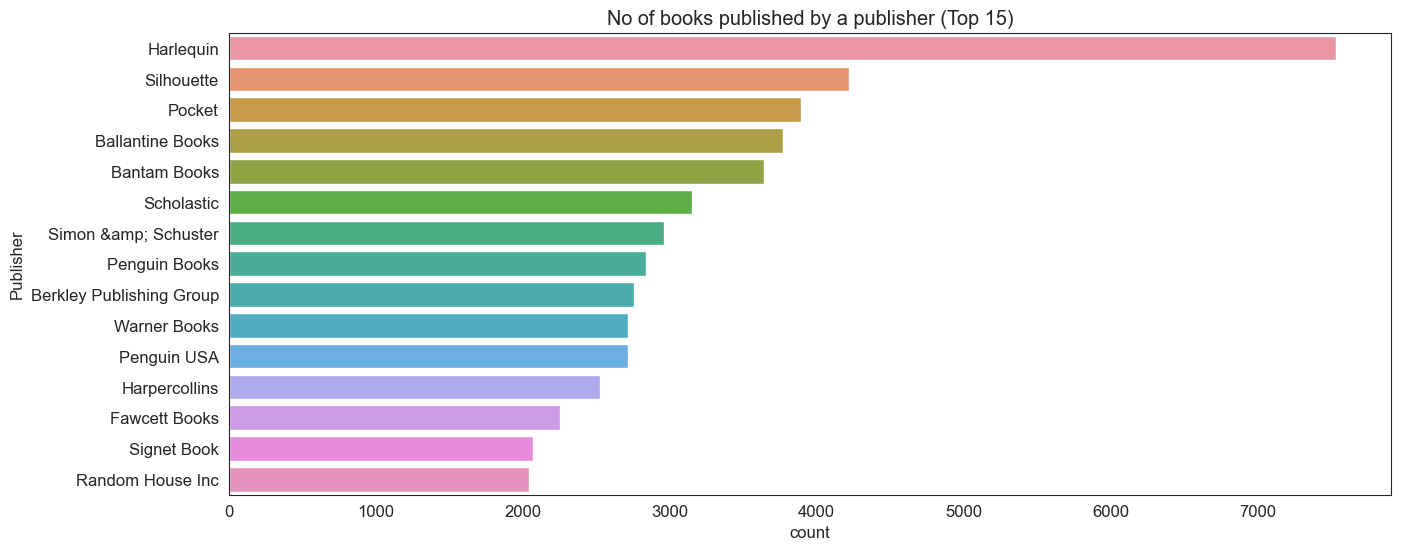

In [86]:
plt.figure(figsize=(15,6))
sns.countplot(y="Publisher", data=books_df,order=books_df['Publisher'].value_counts().index[0:15])
plt.title("No of books published by a publisher (Top 15)")

Text(0.5, 1.0, 'No of readers from each country (Top 10)')

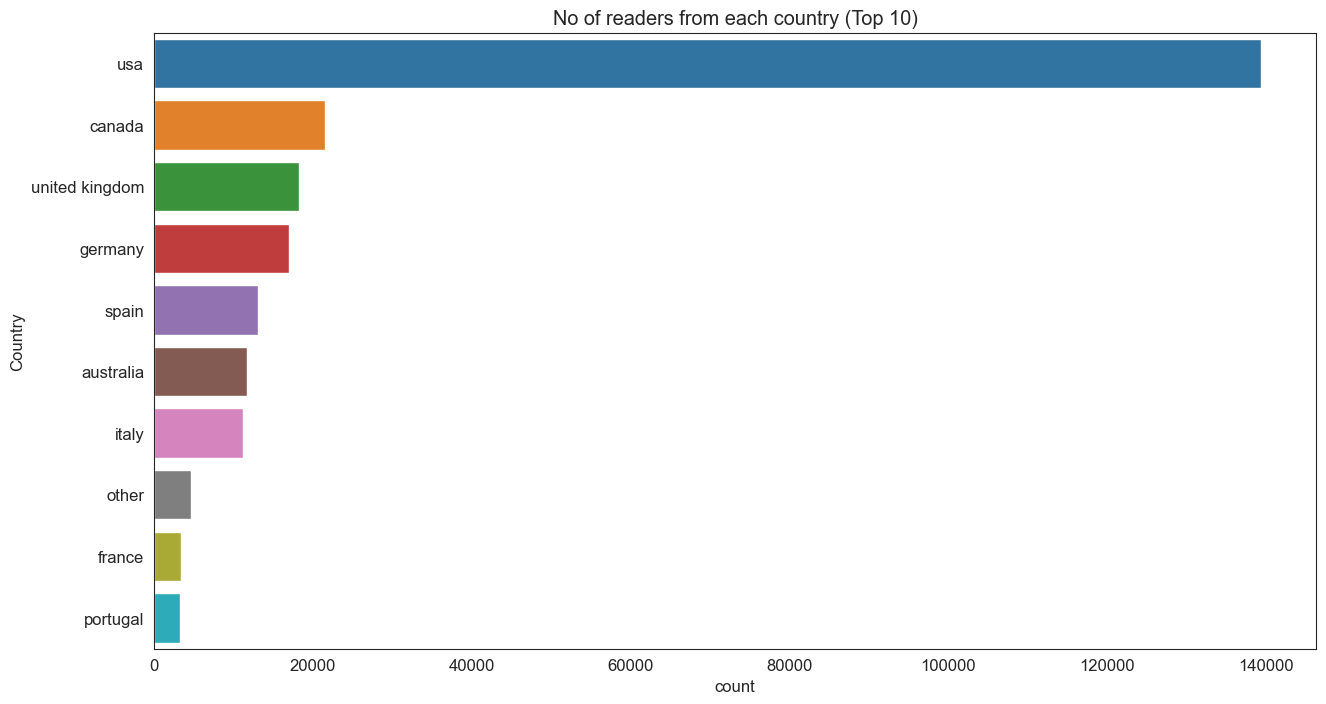

In [87]:
# countries with most readers
plt.figure(figsize=(15,8))
sns.countplot(y="Country", data=users_df, order=users_df['Country'].value_counts().index[0:10])
plt.title("No of readers from each country (Top 10)")

* Most of the readers  are from the United States

Text(0.5, 1.0, 'No of readers from each state (Top 15)')

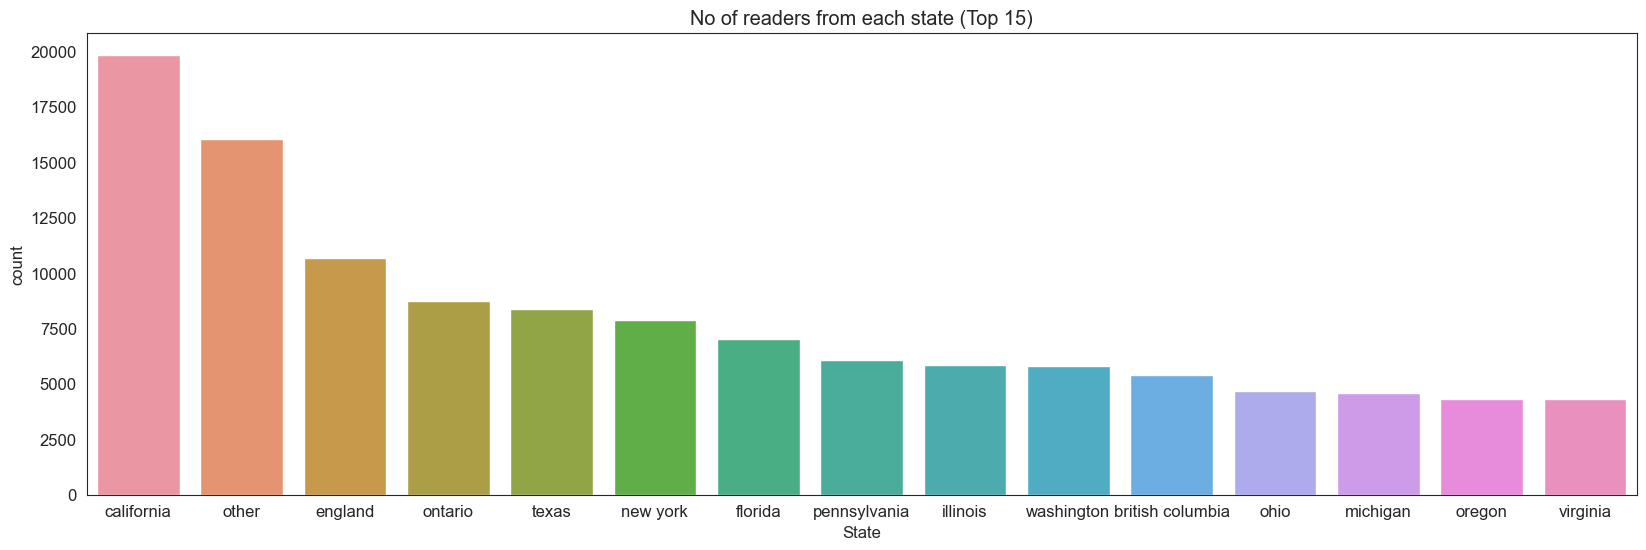

In [88]:
plt.figure(figsize=(20,6))
sns.countplot(x="State", data=users_df,order=users_df['State'].value_counts().index[0:15])
plt.title("No of readers from each state (Top 15)")

Text(0.5, 1.0, 'No of readers from each City (Top 15)')

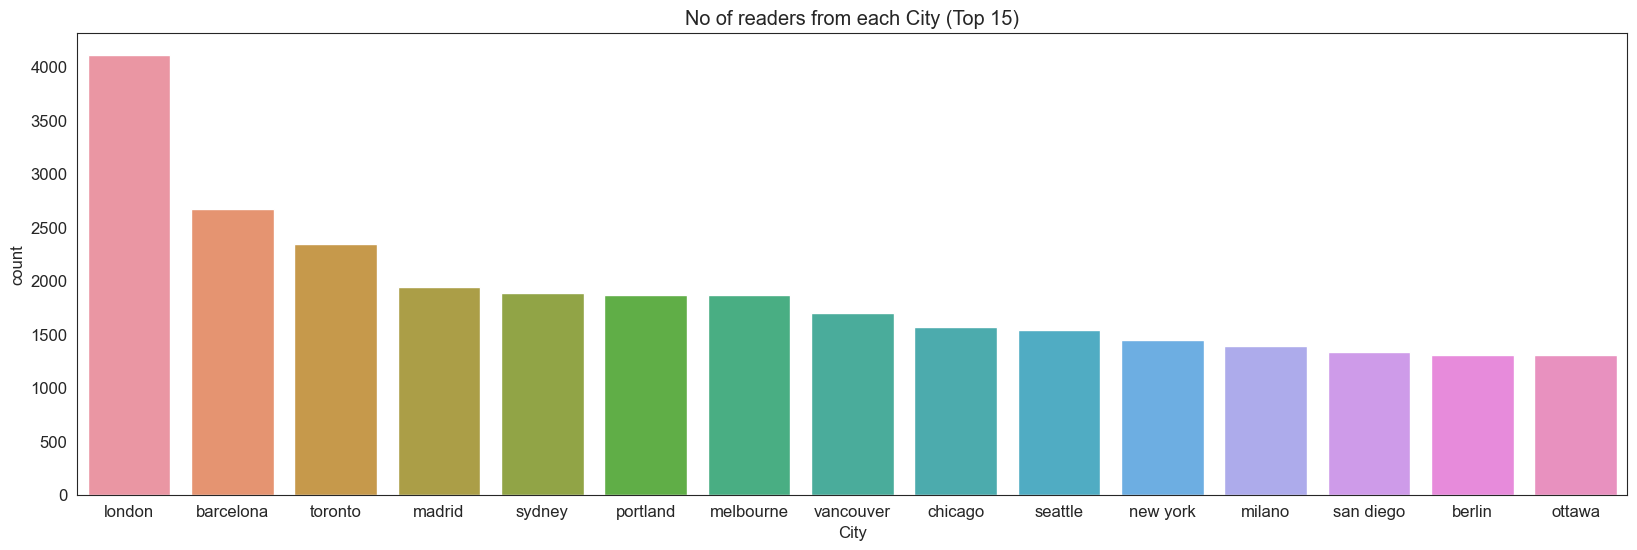

In [89]:
plt.figure(figsize=(20,6))
sns.countplot(x="City", data=users_df,order=users_df['City'].value_counts().index[0:15])
plt.title("No of readers from each City (Top 15)")

# **Popularity Based Recommendation System**

## It is a type of recommendation system that bases choices on factors like popularity and/or current trends. 

## **Simple Popularity based recommendation system**

In [90]:
# function for getting most popular recommendations

def most_popular(df, n):
  if n >= 1 and n <= len(df):
    popular = df.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False).head(n)
    return pd.merge(popular, books_df, on='ISBN')
  return 'Please enter a valid value of n!'

In [91]:
most_popular(df, 3)

,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0316666343,707,The Lovely Bones: A Novel,ALICE SEBOLD,2002.0,"Little, Brown"
1,0971880107,581,Wild Animus,RICH SHAPERO,2004.0,Too Far
2,0385504209,487,The Da Vinci Code,DAN BROWN,2003.0,Doubleday


## **Country-based book recommendation**

In [92]:
# function for getting most popular recommendations country wise

def country_popular(df, country):
  if country in list(df.Country.unique()):
    return most_popular(df[df['Country'] == country], 5) # calling most_popular function to get popular recommendations
  return 'This country is not present in the dataset. Please enter some other country.'

In [93]:
country_popular(df, 'usa')

,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0316666343,531,The Lovely Bones: A Novel,ALICE SEBOLD,2002.0,"Little, Brown"
1,0385504209,392,The Da Vinci Code,DAN BROWN,2003.0,Doubleday
2,0312195516,300,The Red Tent (Bestselling Backlist),ANITA DIAMANT,1998.0,Picador USA
3,0971880107,298,Wild Animus,RICH SHAPERO,2004.0,Too Far
4,0142001740,271,The Secret Life of Bees,SUE MONK KIDD,2003.0,Penguin Books


## **Weighted average rating method**

In [94]:
#finding the average rating and number of votes received by books
df_relevant_data = df.groupby(['Book-Title','Book-Author'],as_index=False).agg(avg_rating=('Book-Rating','mean'),ratings_count=('Book-Rating','count'))
v=df_relevant_data['ratings_count']
R=df_relevant_data['avg_rating']
C=df_relevant_data['avg_rating'].mean()
m=int(df_relevant_data['ratings_count'].quantile(0.90))#minimum number of votes to be listed
print(f'The average rating of all the books is {C} and the minimum number of votes required by the books to be listed is {m}  ')

The average rating of all the books is 7.521552249503576 and the minimum number of votes required by the books to be listed is 4  


In [95]:
#Calculating weighted average rating of the books
df_relevant_data['weighted_average']=round(((R*v)+ (C*m))/(v+m),2)

In [96]:
df_relevant_data.sort_values(by='weighted_average',ascending=False).head(10)

,Book-Title,Book-Author,avg_rating,ratings_count,weighted_average
46515,Harry Potter and the Chamber of Secrets Postcard Book,J. K. ROWLING,9.869565,23,9.52
122144,"The Two Towers (The Lord of the Rings, Part 2)",J. R. R. TOLKIEN,9.653846,52,9.50
30141,Dilbert: A Book of Postcards,SCOTT ADAMS,9.923077,13,9.36
81783,Postmarked Yesteryear: 30 Rare Holiday Postcards,PAMELA E. APKARIAN-RUSSELL,10.000000,11,9.34
118126,"The Return of the King (The Lord of the Rings, Part 3)",J.R.R. TOLKIEN,9.397436,78,9.31
17712,Calvin and Hobbes,BILL WATTERSON,9.583333,24,9.29
100901,The Authoritative Calvin and Hobbes (Calvin and Hobbes),BILL WATTERSON,9.600000,20,9.25
72636,"My Sister's Keeper : A Novel (Picoult, Jodi)",JODI PICOULT,9.545455,22,9.23
118122,"The Return of the King (The Lord of The Rings, Part 3)",J. R. R. TOLKIEN,9.625000,16,9.20
120089,The Sneetches and Other Stories,DR. SEUSS,10.000000,8,9.17


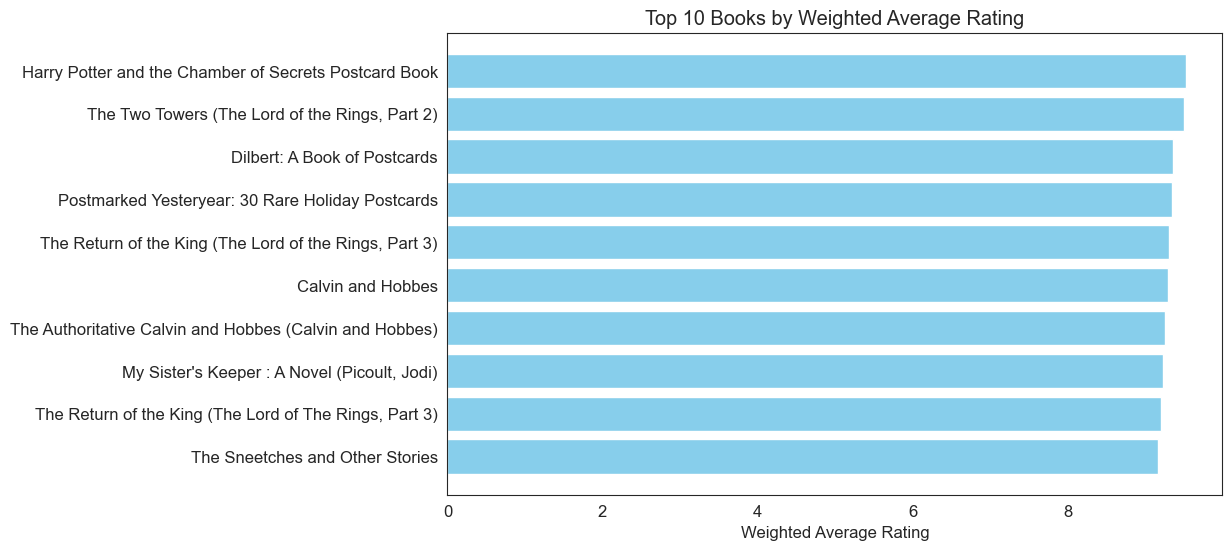

In [97]:
import matplotlib.pyplot as plt

# Calculating the weighted average rating of the books
df_relevant_data['weighted_average'] = round(((R*v) + (C*m)) / (v + m), 2)

# Sorting the dataframe by weighted_average in descending order and selecting the top 10
top_books = df_relevant_data.sort_values(by='weighted_average', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_books['Book-Title'], top_books['weighted_average'], color='skyblue')
plt.xlabel('Weighted Average Rating')
plt.title('Top 10 Books by Weighted Average Rating')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rating at the top
plt.show()



This is the list of most favored books based on the weighted rating scores. The book 'Harry Potter and the Chamber of Secrets Postcard Book' seems to have top this chart.

## **Author based recommender system**

In [98]:
def author_based(book_title,number,df_relevant_data=df_relevant_data):
  '''
  To recommend books from the same author as the book entered by the user
  '''
  author=df_relevant_data.loc[df_relevant_data['Book-Title']==book_title]['Book-Author'].unique()[0]
  author_df=df_relevant_data.loc[(df_relevant_data['Book-Author']==author)].sort_values(by='weighted_average',ascending=False)
  print(f'The author of the book {book_title} is {author}\n')
  print(f'Here are the top {number} books from the same author\n')
  top_rec=author_df.loc[(author_df['Book-Title']!=book_title),['Book-Title','weighted_average']].head(number)
  return(top_rec)


In [99]:
#get book name and number of books to recommend
book_title = 'Harry Potter and the Chamber of Secrets (Book 2)'
number =5
author_based(book_title,number)
# top_recommendations from the same author

The author of the book Harry Potter and the Chamber of Secrets (Book 2) is J. K. ROWLING

Here are the top 5 books from the same author



,Book-Title,weighted_average
46515,Harry Potter and the Chamber of Secrets Postcard Book,9.52
46519,Harry Potter and the Goblet of Fire (Book 4),9.10
46531,Harry Potter and the Prisoner of Azkaban (Book 3),9.02
46538,Harry Potter and the Sorcerer's Stone (Book 1),9.02
46523,Harry Potter and the Order of the Phoenix (Book 5),9.01


---
# **Collaborative filtering**





### Collaborative filtering techniques create a model based on past user activity (items previously purchased, movies viewed and rated, etc.) as well as usage choices made by both current and past users. Then, this model is used to predict the ratings for items or items themselves that the user might be interested in.
---

## **Memory Based Approach**

### **KNN Based Algorithm**

In [100]:
# we kept running into memory issues, so decided to reduce some data by filtering things out
# focussing on users with more than 3 ratings and top 10% most frequently rated books
required_ratings = 3

user = df['User-ID'].value_counts()
user_list = user[user >required_ratings].index.to_list()
filter_df = df[df['User-ID'].isin(user_list)]

print('Number of users with ratings more than 3 are: {}'.format(filter_df.shape[0]))

Number of users with ratings more than 3 are: 313417


In [101]:
# top 10% most frequently rated books
required = len(filter_df.ISBN.unique()) * 0.1

user_list = filter_df['Book-Title'].value_counts().head(int(required)).index.to_list()
filter_df = filter_df[filter_df['Book-Title'].isin(user_list)]

print('Number of top 10% users are: {}'.format(filter_df.shape[0]))

Number of top 10% users are: 167394


In [102]:
# shape of final dataset
filter_df.shape

(167394, 12)

In [103]:
# creating a pivot table
table = filter_df.pivot_table(columns='User-ID', index='Book-Title', values='Book-Rating')
table

User-ID,8,17,53,99,114,183,232,242,243,244,...,278633,278637,278648,278663,278668,278694,278773,278843,278851,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
!Yo!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
".Hack: //Legend of the Twilight, Vol. 1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iI Paradiso Degli Orchi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
murder@maggody.com : An Arly Hanks Mystery (Arly Hanks Mysteries (Paperback)),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
one hundred years of solitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
# filling null values
table.fillna(0, inplace=True)
table

User-ID,8,17,53,99,114,183,232,242,243,244,...,278633,278637,278648,278663,278668,278694,278773,278843,278851,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
!Yo!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
".Hack: //Legend of the Twilight, Vol. 1",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iI Paradiso Degli Orchi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
murder@maggody.com : An Arly Hanks Mystery (Arly Hanks Mysteries (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
one hundred years of solitude,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
# converting to sparse matrix
from scipy.sparse import csr_matrix

sparse = csr_matrix(table)
sparse

<13403x14947 sparse matrix of type '<class 'numpy.float64'>'
	with 166539 stored elements in Compressed Sparse Row format>

In [106]:
#Creating an instance of KNN
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(algorithm='brute')
model.fit(sparse)

NearestNeighbors(algorithm='brute')

In [107]:
# function to get recommendations

def get_recommendations(name, n):

  # getting book id
  book_id= np.where(table.index==name)[0][0]

  # distances and suggestions based on similarity
  distances, suggestions = model.kneighbors(table.iloc[book_id, :].values.reshape(1,-1),n_neighbors=n+1)
  suggestions = suggestions.flatten().tolist()

  for i in range(len(suggestions)):
    # if book is same as input
    if i==0:
      print('The top {} Recommended books for {} are:\n'.format(n, name))
    else:
      print(table.index[suggestions[i]])
  return

In [108]:
get_recommendations('Harry Potter and the Chamber of Secrets (Book 2)', 10)

The top 10 Recommended books for Harry Potter and the Chamber of Secrets (Book 2) are:

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)
Dr. Seuss's A B C (I Can Read It All by Myself Beginner Books)
The Second Generation
Lover Beware
J. K. Rowling: The Wizard Behind Harry Potter
A Dash of Death
So Much to Tell You
Dragonquest Achille Cover


## Recommendation Systems

In [109]:
bookName = input("Enter a book name: ")
number = int(input("Enter number of books to recommend: "))

# The Notebook

Enter a book name:  The Notebook
Enter number of books to recommend:  5


<h5><b> 1. Popularity Based (Top In whole collection)


In [110]:
def popularity_based(df, n):
    if n >= 1 and n <= len(df):
        data = pd.DataFrame(df.groupby('ISBN')['Book-Rating'].count()).sort_values('Book-Rating', ascending=False).head(n)
        result = pd.merge(data, books_df, on='ISBN')
        return result
    return "Invalid number of books entered!!"

In [111]:

popularity_based(df, number)

,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0316666343,707,The Lovely Bones: A Novel,ALICE SEBOLD,2002.0,"Little, Brown"
1,0971880107,581,Wild Animus,RICH SHAPERO,2004.0,Too Far
2,0385504209,487,The Da Vinci Code,DAN BROWN,2003.0,Doubleday
3,0312195516,383,The Red Tent (Bestselling Backlist),ANITA DIAMANT,1998.0,Picador USA
4,0060928336,320,Divine Secrets of the Ya-Ya Sisterhood: A Novel,REBECCA WELLS,1997.0,Perennial


<h5><b> 2.Popularity Based (Top In a given place)

In [112]:
def search_unique_places(df, place):
    place = place.lower()

    if place in list(df['City'].unique()):
        return df[df['City'] == place]
    elif place in list(df['State'].unique()):
        return df[df['State'] == place]
    elif place in list(df['Country'].unique()):
        return df[df['Country'] == place]
    else:
        return "Invalid Entry"

In [114]:
place = input("Enter the name of place: ")
data = search_unique_places(df, place)

if isinstance(data, pd.DataFrame):
    data = popularity_based(data, number)

data

Enter the name of place:  spain


,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0060194928,1,Hija de la fortuna,ISABEL ALLENDE,1999.0,HarperCollins
1,0060563079,1,Peter Pan: The Original Story (Peter Pan),J. M. BARRIE,2003.0,HarperFestival
2,9500816105,1,La dÃ©cima revelaciÃ³n,JAMES REDFIELD,2001.0,Atlantida
3,8495808021,1,El Secreto De Amanda,CHRISTINA SEHWATZ,2003.0,Diagonal -Grupo 62
4,8495501260,1,"Voces del Desierto, Las - Bolsillo",MARLO MORGAN,2000.0,Suma de Letras


<b><h5>3. Books by same author, publisher of given book name


In [115]:
def printBook(k, n):
    z = k['Book-Title'].unique()
    for x in range(len(z)):
        print(z[x])
        if x >= n-1:
            break
            

In [116]:
def get_books(dataframe, name, n):
    print("\nBooks by same Author:\n")
    au = dataframe['Book-Author'].unique()

    data = df[df['Book-Title'] != name]

    if au[0] in list(data['Book-Author'].unique()):
        k2 = data[data['Book-Author'] == au[0]]
    k2 = k2.sort_values(by=['Book-Rating'])
    printBook(k2, n)

    print("\n\nBooks by same Publisher:\n")
    au = dataframe['Publisher'].unique()

    if au[0] in list(data['Publisher'].unique()):
        k2 = pd.DataFrame(data[data['Publisher'] == au[0]])
    k2=k2.sort_values(by=['Book-Rating']) 
    printBook(k2, n)

In [117]:
if bookName in list(df['Book-Title'].unique()):
    d = df[df['Book-Title'] == bookName]
    get_books(d, bookName, number)
else:
    print("Invalid Book Name!!")


Books by same Author:

Message in a Bottle
A Bend in the Road
The Wedding
A Walk to Remember
The Guardian


Books by same Publisher:

The Sky Is Falling
The Bridges of Madison County
The Value of Family : A Blueprint for the 21st Century
The Raven in the Foregate (Brother Cadfael Mysteries)
The Hilton Head Metabolism Diet : The Revolutionary New Plan That Teaches Your Body to Burn off Fat--and Keep it off Permanently
